In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다.
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


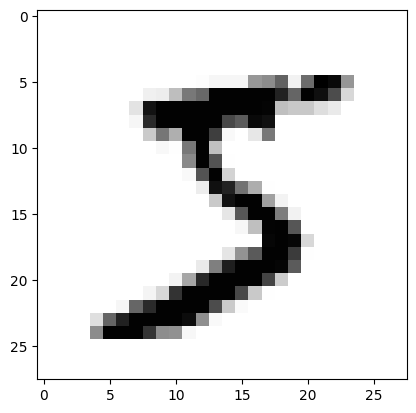

In [2]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [3]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [4]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정 구간입니다.
modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.19141, saving model to ./MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.19141 to 0.13646, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13646 to 0.12236, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.12236 to 0.09993, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09993 to 0.09282, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09282 to 0.09148, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09148 to 0.08465, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08465

Epoch 9: val_loss improved from 0.08465 to 0.08095, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss did not improve from 0.08095

Epoch 11: val_loss improved from 0.08095 to 0.08084, saving model to ./MNIST_MLP.hdf5

Epoch 12: val_loss did not improve from 0.08084

Epoch 13: val_loss did not improve from 0.08084

Epoch 14: val_loss did not improve from 0.08084

Epoch 15: val_loss did not improve from 0.08084

Epoch 16: val_los

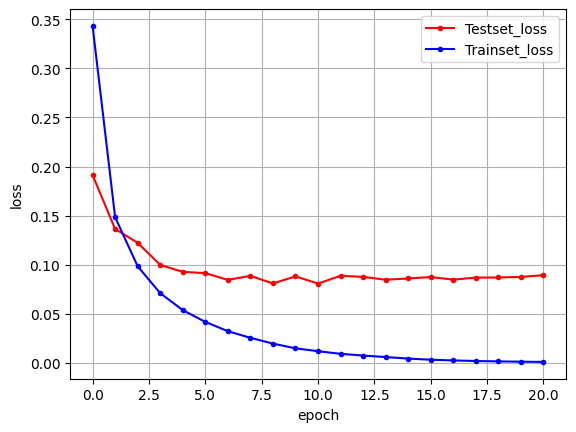

In [7]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()